In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [2]:
df =  pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# check data type and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# check missing vaule
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# encoding to categorical features
encoder = LabelEncoder()
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

In [8]:
# encoding to categorical features
encoder = OneHotEncoder()
df= pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


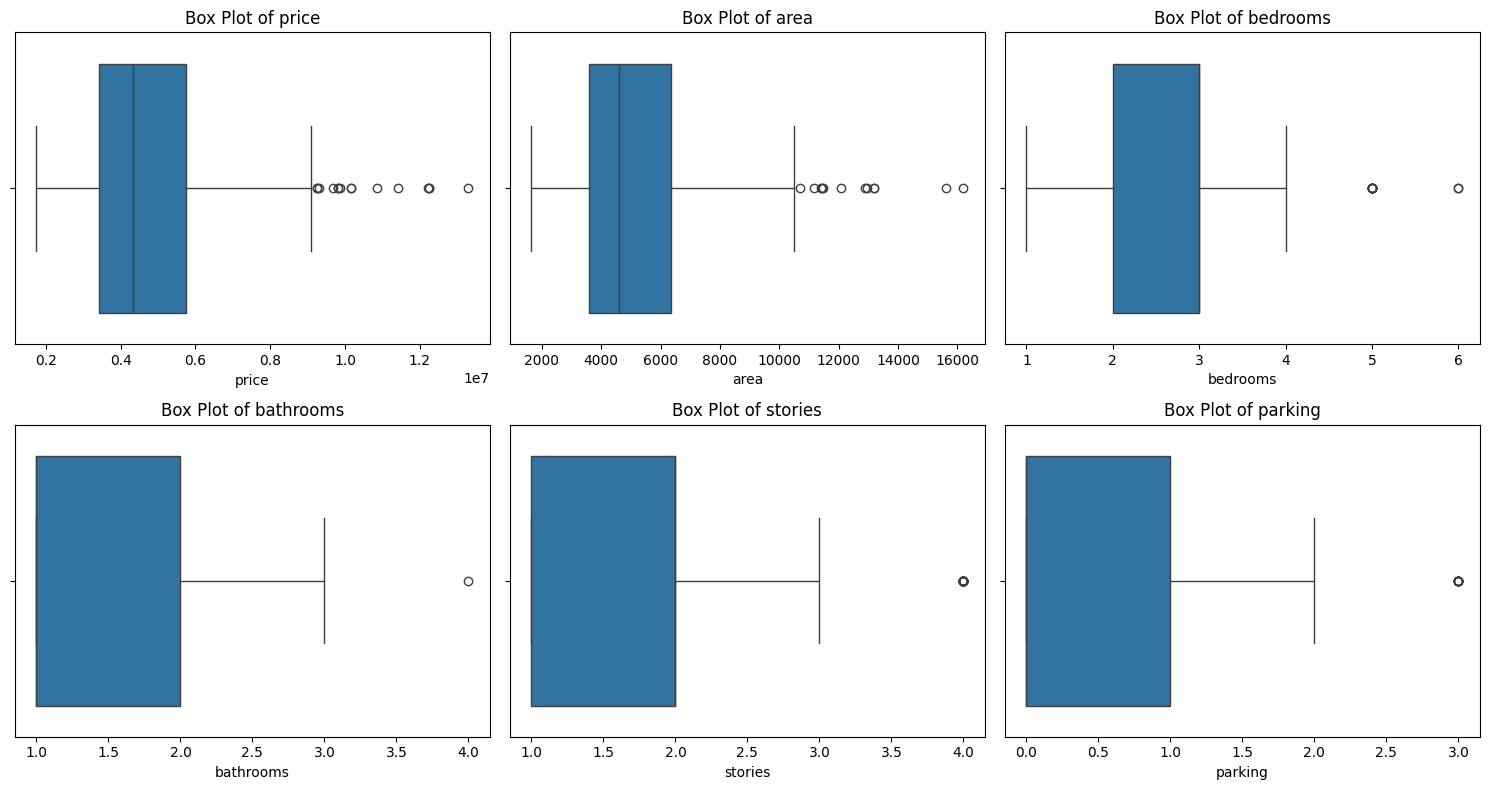

In [10]:
# check outlier
columns_to_analyze = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 8))
for i, col in enumerate(columns_to_analyze):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [11]:
# using log transformer instead
for col in columns_to_analyze:
  df[col] = np.log1p(df[col])


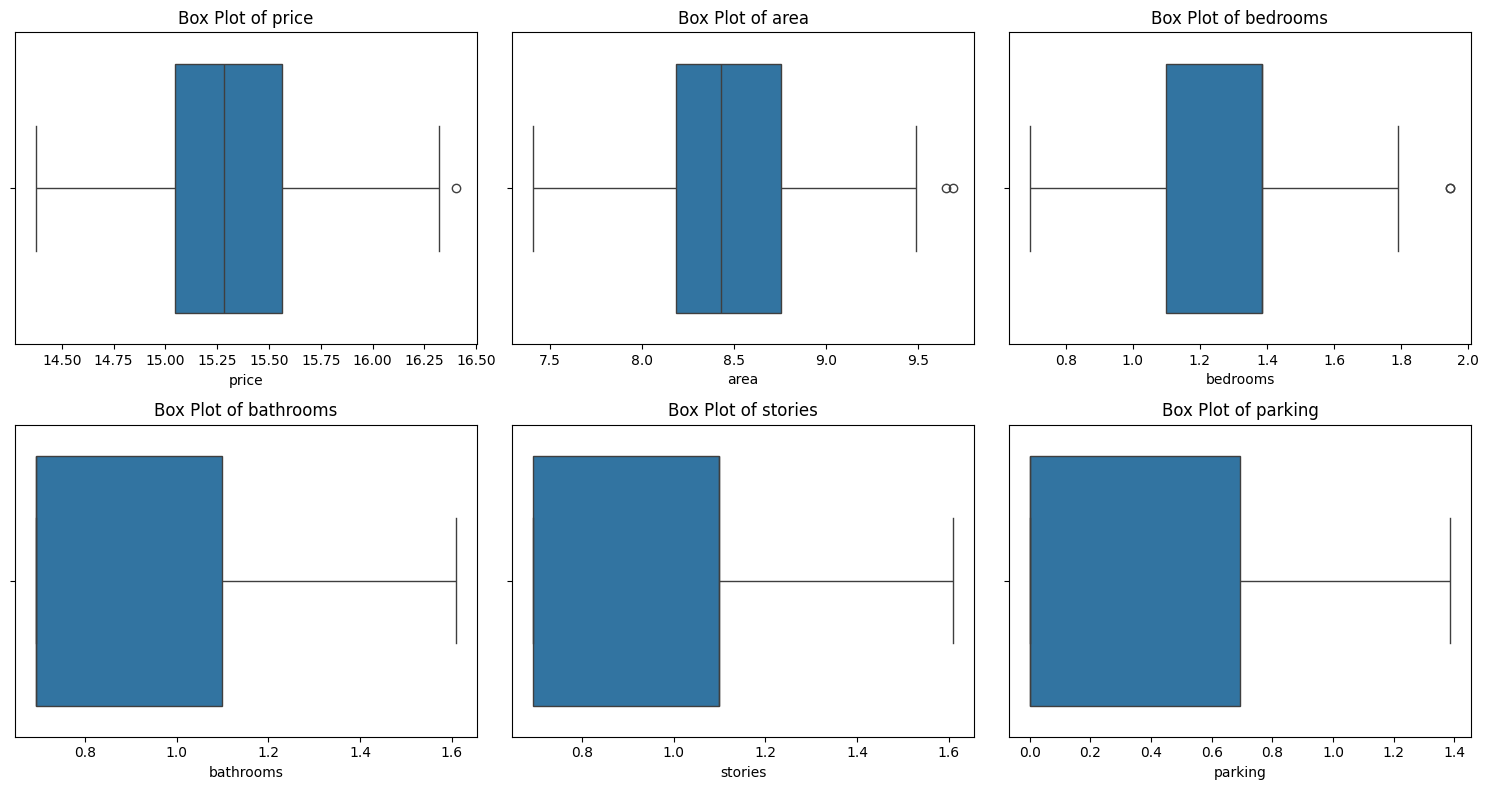

In [12]:
# check outlier after log transformer

plt.figure(figsize=(15, 8))
for i, col in enumerate(columns_to_analyze):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

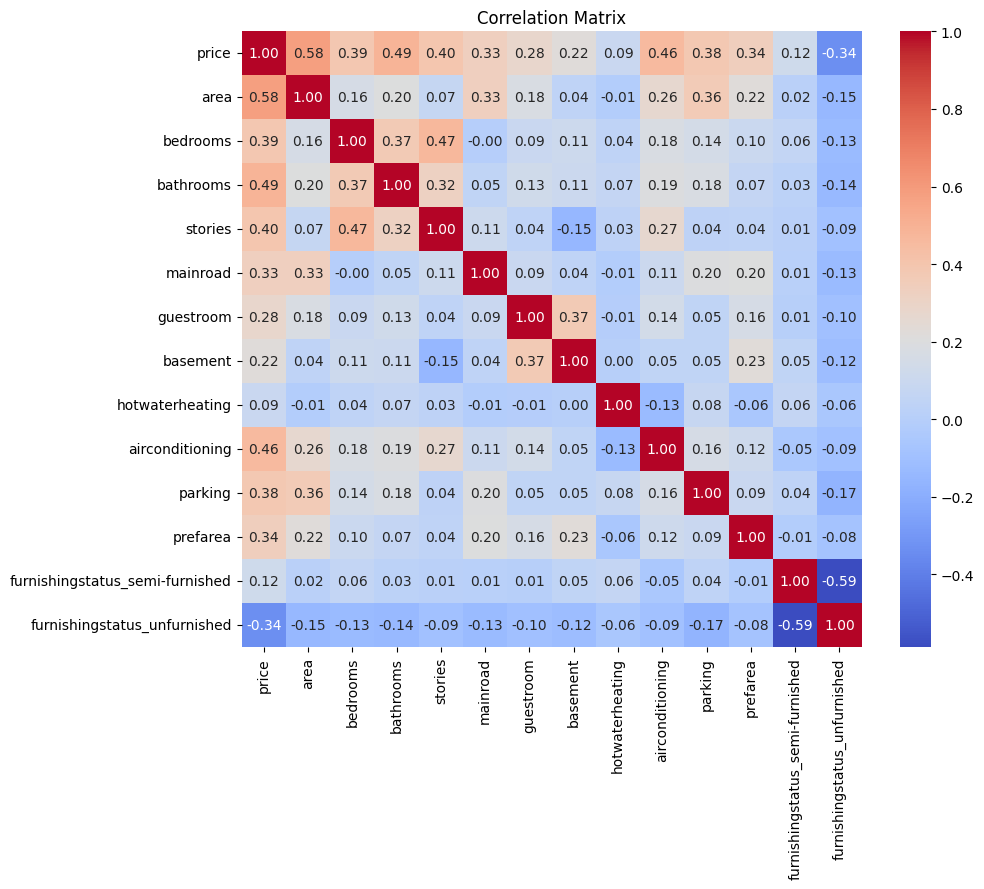

In [13]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
top_corr = corr_matrix["price"].sort_values(ascending=False)
print("Top 3 correlated features with Price:")
print(top_corr.head(4))

Top 3 correlated features with Price:
price              1.000000
area               0.580085
bathrooms          0.489741
airconditioning    0.455159
Name: price, dtype: float64


In [15]:
# split to train and test
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = df['price'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


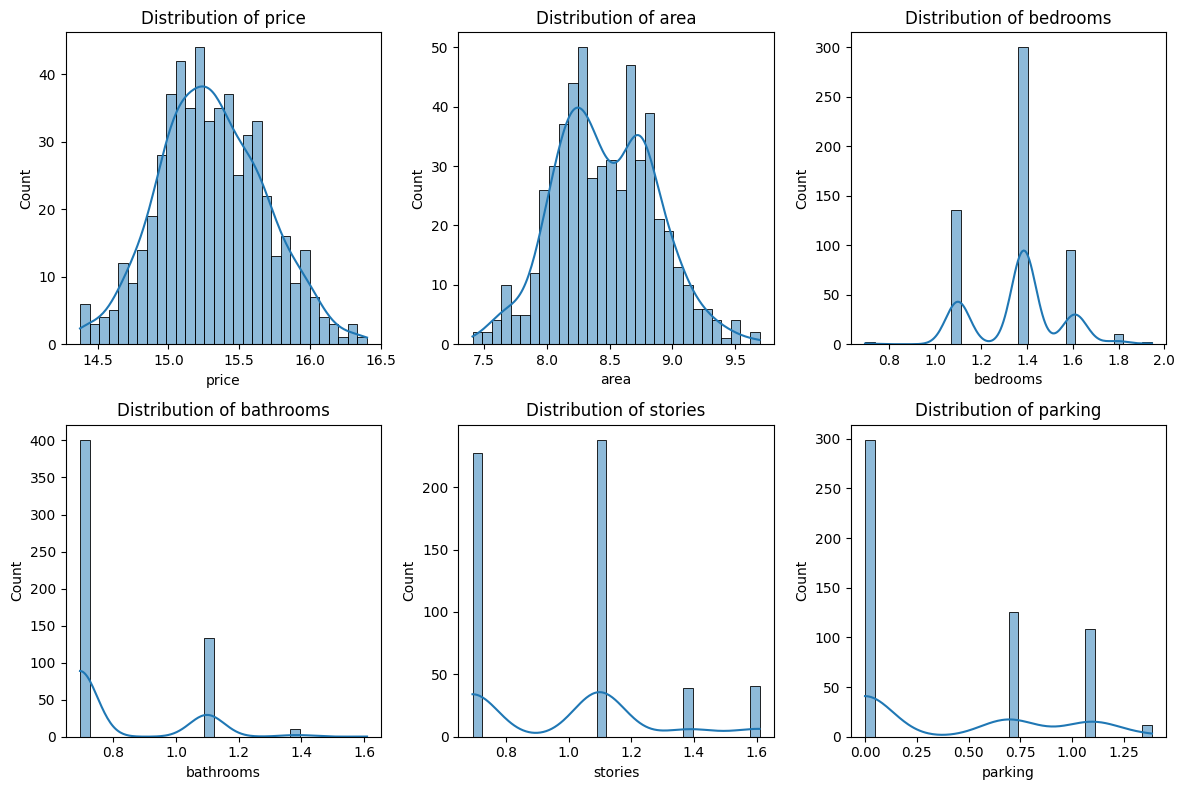

In [16]:

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_analyze , 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [17]:
df[columns_to_analyze].skew()

,0
price,0.140863
area,0.133747
bedrooms,-0.101494
bathrooms,1.310299
stories,0.525950
parking,0.501800


In [18]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df[['price', 'area', 'bedrooms', 'stories', 'parking']] = scaler_standard.fit_transform(
    df[['price', 'area', 'bedrooms', 'stories', 'parking']]
)

df[['bathrooms']] = scaler_minmax.fit_transform(df[['bathrooms']])

In [19]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# model evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"\nLinear regression Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear regression Model Performance:
MAE: 0.20
MSE: 0.06
RMSE: 0.25
R² Score: 0.6820


In [20]:
# random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Random Forest Model Performance:
MAE: 0.21
MSE: 0.07
RMSE: 0.27
R² Score: 0.6289
